In [1]:
#hyper tuninig of parameters in neural network
!pip install -q -U keras-tuner
from tensorflow import keras
import keras_tuner

     |████████████████████████████████| 135 kB 13.9 MB/s 
     |████████████████████████████████| 1.6 MB 66.4 MB/s 


In [2]:
pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras_tuner import RandomSearch
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
import scikeras
from scikeras.wrappers import KerasRegressor
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.concat(map(pd.read_csv,["/content/gt_2011.csv",
                                  "/content/gt_2012.csv",
                                  "/content/gt_2013.csv",
                                  "/content/gt_2014.csv",
                                  "/content/gt_2015.csv"]),ignore_index=True)
df.shape

(36733, 11)

In [5]:
df.head(2)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377


In [6]:
X = df[['AT','AP','AH','AFDP','GTEP','TIT','TAT','CDP','CO','NOX']]
Y = df['TEY']

In [7]:
X.shape,Y.shape

((36733, 10), (36733,))

In [8]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3, random_state=7)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((25713, 10), (11020, 10), (25713,), (11020,))

- Standardize features by removing the mean and scaling to unit variance

In [9]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
model = Sequential()
model.add(Dense(128, input_dim=10, activation='relu'))
model.add(Dense(64, activation='relu'))
#Output layer
model.add(Dense(1, activation='linear'))

In [11]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,729
Trainable params: 9,729
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.2, epochs =100)

Epoch 1/100
643/643 [==============================] - 2s 2ms/step - loss: 3108.5273 - mae: 35.8376 - val_loss: 160.1540 - val_mae: 9.5526
Epoch 2/100
643/643 [==============================] - 1s 2ms/step - loss: 99.6638 - mae: 7.2811 - val_loss: 65.7716 - val_mae: 5.6341
Epoch 3/100
643/643 [==============================] - 1s 2ms/step - loss: 40.4341 - mae: 4.4203 - val_loss: 25.0996 - val_mae: 3.3978
Epoch 4/100
643/643 [==============================] - 1s 2ms/step - loss: 15.8326 - mae: 2.6724 - val_loss: 9.7213 - val_mae: 2.0729
Epoch 5/100
643/643 [==============================] - 1s 2ms/step - loss: 6.5451 - mae: 1.7103 - val_loss: 4.4422 - val_mae: 1.3971
Epoch 6/100
643/643 [==============================] - 1s 2ms/step - loss: 3.3062 - mae: 1.2528 - val_loss: 2.5776 - val_mae: 1.1446
Epoch 7/100
643/643 [==============================] - 2s 3ms/step - loss: 2.0078 - mae: 1.0158 - val_loss: 1.6476 - val_mae: 0.9397
Epoch 8/100
643/643 [==============================] - 2s 

In [13]:
Y_pred = model.predict(X_test_scaled)
mse_nn = mean_squared_error(Y_test, Y_pred)
mae_nn = mean_absolute_error(Y_test,Y_pred)
r2_nn= r2_score(Y_test,Y_pred)

mse_neural, mae_neural = model.evaluate(X_test_scaled, Y_test)
print('Mean squared error from neural net: ', mse_nn)
print('Mean absolute error from neural net: ', mae_nn)
print('R2 from neural net: ', r2_nn)

345/345 [==============================] - 0s 910us/step - loss: 0.3802 - mae: 0.4585
Mean squared error from neural net:  0.3802455966251582
Mean absolute error from neural net:  0.45847290939081814
R2 from neural net:  0.9984522119618496


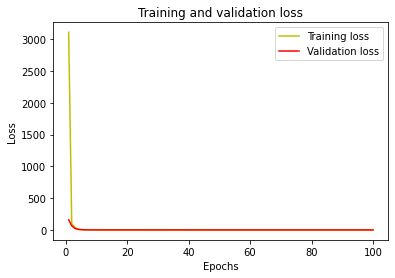

In [14]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

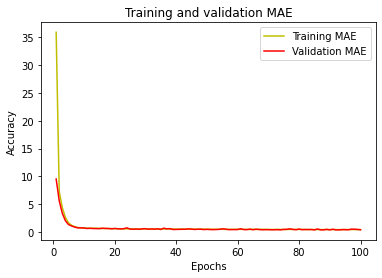

In [15]:
acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
def fun_regression_ann( optimizer='adam', loss='mse',learning_rate=0.001):
    model = Sequential()
    model.add(Dense(28, input_dim=10,activation='relu'))
    model.add(Dense(14, activation='relu'))
    model.add(Dense(1,activation='linear' ))
    model.compile(loss=loss, optimizer=optimizer)
    return model

In [17]:
fun_regression_ann().summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 28)                308       
                                                                 
 dense_4 (Dense)             (None, 14)                406       
                                                                 
 dense_5 (Dense)             (None, 1)                 15        
                                                                 
Total params: 729
Trainable params: 729
Non-trainable params: 0
_________________________________________________________________


In [18]:
param_grid = {'optimizer': ['adam'],
     'loss': ['mse','mae'],
     'epochs': [20, 100, 200, 500]}

In [19]:
grid_search = GridSearchCV(
    estimator=KerasRegressor(fun_regression_ann,learning_rate=0.001,verbose=1),
    param_grid=param_grid,cv=3)

In [20]:
grid_result = grid_search.fit(X_train_scaled, Y_train)

Streaming output truncated to the last 5000 lines.
536/536 [==============================] - 1s 1ms/step - loss: 0.6739
Epoch 105/200
536/536 [==============================] - 1s 1ms/step - loss: 0.6796
Epoch 106/200
536/536 [==============================] - 1s 1ms/step - loss: 0.6726
Epoch 107/200
536/536 [==============================] - 1s 1ms/step - loss: 0.6780
Epoch 108/200
536/536 [==============================] - 1s 1ms/step - loss: 0.6850
Epoch 109/200
536/536 [==============================] - 1s 1ms/step - loss: 0.6805
Epoch 110/200
536/536 [==============================] - 1s 1ms/step - loss: 0.6704
Epoch 111/200
536/536 [==============================] - 1s 1ms/step - loss: 0.6744
Epoch 112/200
536/536 [==============================] - 1s 1ms/step - loss: 0.6713
Epoch 113/200
536/536 [==============================] - 1s 1ms/step - loss: 0.6849
Epoch 114/200
536/536 [==============================] - 1s 1ms/step - loss: 0.6735
Epoch 115/200
536/536 [================

In [21]:
grid_search.best_params_

{'epochs': 500, 'loss': 'mse', 'optimizer': 'adam'}

In [22]:
accuracy = grid_search.best_score_
accuracy

0.9980787196548221

In [23]:
estimator = KerasRegressor(build_fn=fun_regression_ann, verbose=True,loss='mse',optimizer='adam',epochs=500,learning_rate=0.001)
estimator.fit(X_train_scaled, Y_train)

Epoch 1/500
804/804 [==============================] - 1s 1ms/step - loss: 5716.7075
Epoch 2/500
804/804 [==============================] - 1s 1ms/step - loss: 232.6427
Epoch 3/500
804/804 [==============================] - 1s 1ms/step - loss: 105.1017
Epoch 4/500
804/804 [==============================] - 1s 1ms/step - loss: 57.9087
Epoch 5/500
804/804 [==============================] - 1s 1ms/step - loss: 31.2833
Epoch 6/500
804/804 [==============================] - 1s 1ms/step - loss: 16.0900
Epoch 7/500
804/804 [==============================] - 1s 1ms/step - loss: 8.0727
Epoch 8/500
804/804 [==============================] - 1s 1ms/step - loss: 4.2524
Epoch 9/500
804/804 [==============================] - 1s 1ms/step - loss: 2.5130
Epoch 10/500
804/804 [==============================] - 1s 1ms/step - loss: 1.6528
Epoch 11/500
804/804 [==============================] - 1s 1ms/step - loss: 1.2688
Epoch 12/500
804/804 [==============================] - 1s 1ms/step - loss: 1.1056
Epo

KerasRegressor(
	model=None
	build_fn=<function fun_regression_ann at 0x7fe0bd816c20>
	warm_start=False
	random_state=None
	optimizer=adam
	loss=mse
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=True
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=500
	learning_rate=0.001
)

In [24]:
prediction = estimator.predict(X_test_scaled)
mse_krr = mean_squared_error(Y_test, prediction)
mae_krr=mean_absolute_error(Y_test,prediction)
r2_krr= r2_score(Y_test,prediction)
print('Mean squared error (MSE): ', mse_krr)
print('Mean absolute error (MAE): ', mae_krr)
print('R2 Score: ',r2_krr)

345/345 [==============================] - 0s 714us/step
Mean squared error (MSE):  0.4188821392809604
Mean absolute error (MAE):  0.4754189966551406
R2 Score:  0.9982949420839368
